## Importing Libraries

In [61]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
from matplotlib.pyplot import figure
from PIL import Image

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,7) # Adjust the configuration of the plots we will create

## Loading the dataset

In [62]:
#Let's look at the data

df = pd.read_csv('AB_NYC_2019.csv') 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [63]:
# Data types for our columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [64]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

id - 0.0%
name - 0.00032723182329481544%
host_id - 0.0%
host_name - 0.00042949176807444524%
neighbourhood_group - 0.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.0%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 0.20558339298496778%
reviews_per_month - 0.20558339298496778%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%


## Data cleaning

In [65]:
#dropping unnecessary columns
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

df.sample(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
28202,Large 2 Bedroom Apt in East Village,11713422,Manhattan,East Village,40.73025,-73.98610,Entire home/apt,349,5,0,NaN,2,0
8706,"Clean, Trendy, Private Room in LES",35000945,Manhattan,Lower East Side,40.71748,-73.98364,Private room,60,1,0,NaN,1,0
1033,"An airy, comfy, bookish refuge!",2116807,Brooklyn,Vinegar Hill,40.70279,-73.98284,Entire home/apt,190,4,8,0.09,1,0
36947,Heart of nyc. Harlem.,39301747,Manhattan,Harlem,40.81801,-73.93855,Entire home/apt,78,1,27,3.86,1,33
47078,Time square Hell’s Kitchen 2bedroom,245518352,Manhattan,Hell's Kitchen,40.76135,-73.99343,Entire home/apt,400,3,0,NaN,1,161


In [66]:
df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [67]:
#replacing all NaN values in column 'reviews_per_month' with 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [68]:
#removing all duplications from DataFrame

#df = df.drop_duplicates(subset=['host_id'], keep='first')

In [69]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [70]:
# As you you can see we have outliers in the "price" column, so I decided to filter them out from a dataset 
# for appropriate visualisation of scatter plot diagram

df = df[df.price <= 400]
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.713200e+04,47132.000000,47132.000000,47132.000000,47132.000000,47132.000000,47132.000000,47132.000000,47132.000000
mean,6.677743e+07,40.728733,-73.951293,126.405202,6.974391,23.679411,1.101891,6.877323,110.329288
std,7.793380e+07,0.054983,0.046287,78.172200,20.343423,44.992536,1.606711,31.838255,130.626161
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.764832e+06,40.689650,-73.982340,67.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,3.048043e+07,40.722320,-73.954870,100.000000,2.000000,5.000000,0.380000,1.000000,41.000000
75%,1.064605e+08,40.763343,-73.935030,165.000000,5.000000,24.000000,1.610000,2.000000,219.000000
max,2.743213e+08,40.913060,-73.712990,400.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [71]:
# Let's sort a dataset by price per night or 'price' column
df = df.sort_values(by=['price'], inplace=False, ascending=False)
df.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9221,585 sf Luxury Studio,36976268,Manhattan,Upper West Side,40.76807,-73.98342,Entire home/apt,400,1,0,0.00,1,0
30611,1 Bedroom Apt with Terrace in East Village-Ter...,177353847,Manhattan,East Village,40.72619,-73.99019,Entire home/apt,400,4,8,0.51,4,161
24281,Modern 2 Bedroom in Heart of Williamsburg,6405437,Brooklyn,Williamsburg,40.71201,-73.96144,Entire home/apt,400,2,6,0.25,1,0
31572,Beautiful Gut Renovated NYC 1 Bedroom LOFT,105797483,Manhattan,Midtown,40.74520,-73.98427,Entire home/apt,400,1,16,1.14,1,47
12284,Hells Kitchen hideaway,1557889,Manhattan,Hell's Kitchen,40.75826,-73.98923,Entire home/apt,400,5,15,0.35,2,78
1658,Sunny 2BR Penthouse - HUGE Terrace,3916070,Manhattan,Chinatown,40.71592,-73.98980,Entire home/apt,400,3,46,0.57,1,175
31503,Global Beat Apartment Hideaway in Manhattan,3464645,Manhattan,Chelsea,40.74732,-73.99990,Entire home/apt,400,2,0,0.00,3,0
47435,2 Bed/2 Bath Upper East Manhattan Luxury Doorman,83934468,Manhattan,Upper East Side,40.78149,-73.95168,Entire home/apt,400,14,0,0.00,1,25
46380,LUX Big Apple Apartment near the UN w/ WasherD...,153458126,Manhattan,Murray Hill,40.74791,-73.97957,Entire home/apt,400,1,0,0.00,2,365
24486,Beautiful One Bedroom on the Upper East Side,16685637,Manhattan,Upper East Side,40.76692,-73.96400,Entire home/apt,400,15,0,0.00,1,87


In [72]:
# Third column is room_type

df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

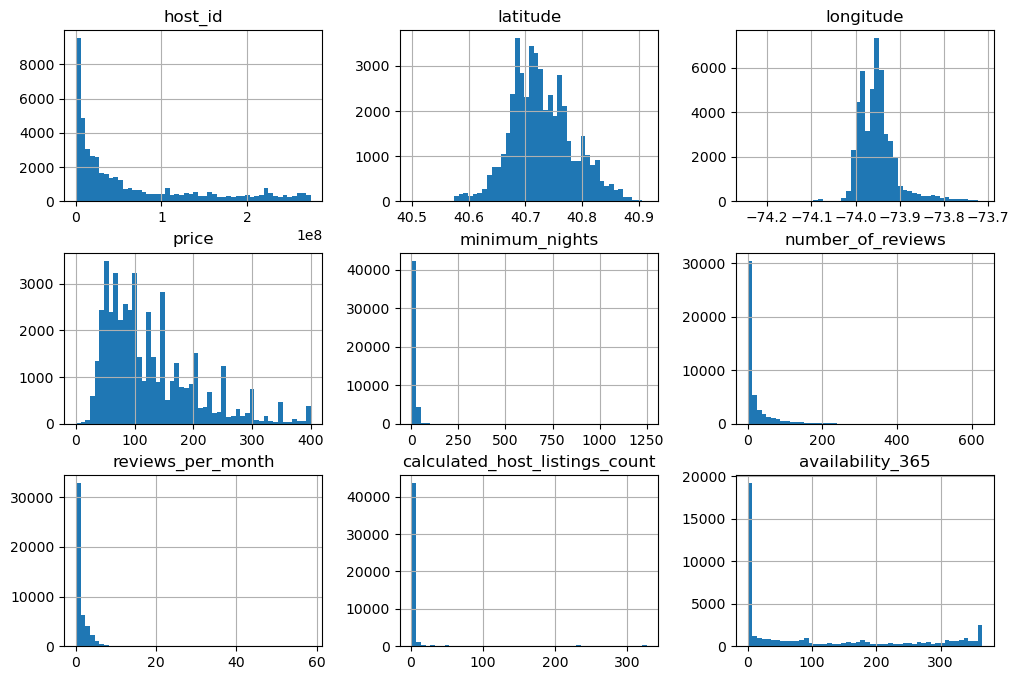

In [73]:
df.hist(bins=50, figsize=(12, 8))
plt.show()                                #Возможно в будущем удалю как не сильно информативную диаграмму

## Data Visualization

In [74]:
# Next step is to calculate the amount of listing per hosts (host_id)

listing_per_host = df.host_id.value_counts().head(20)
listing_per_host

host_id
219517861    284
107434423    220
30283594     113
137358866    103
12243051      96
16098958      94
61391963      91
22541573      87
200380610     54
7503643       52
1475015       52
120762452     50
2856748       46
190921808     45
26377263      43
2119276       39
19303369      37
119669058     34
25237492      34
213781715     33
Name: count, dtype: int64

In [75]:
# Creating additional dataset to show TOP 20 hosts

top_20_host = pd.DataFrame(listing_per_host)

top_20_host.reset_index(inplace=True)

top_20_host

# top_20_host = df.sort_values(by=['calculated_host_listings_count'], ascending=False).head(20)
# top_20_host.reset_index(inplace=True)
# top_20_host[['host_id', 'calculated_host_listings_count']]

,host_id,count
0,219517861,284
1,107434423,220
2,30283594,113
3,137358866,103
4,12243051,96
5,16098958,94
6,61391963,91
7,22541573,87
8,200380610,54
9,7503643,52


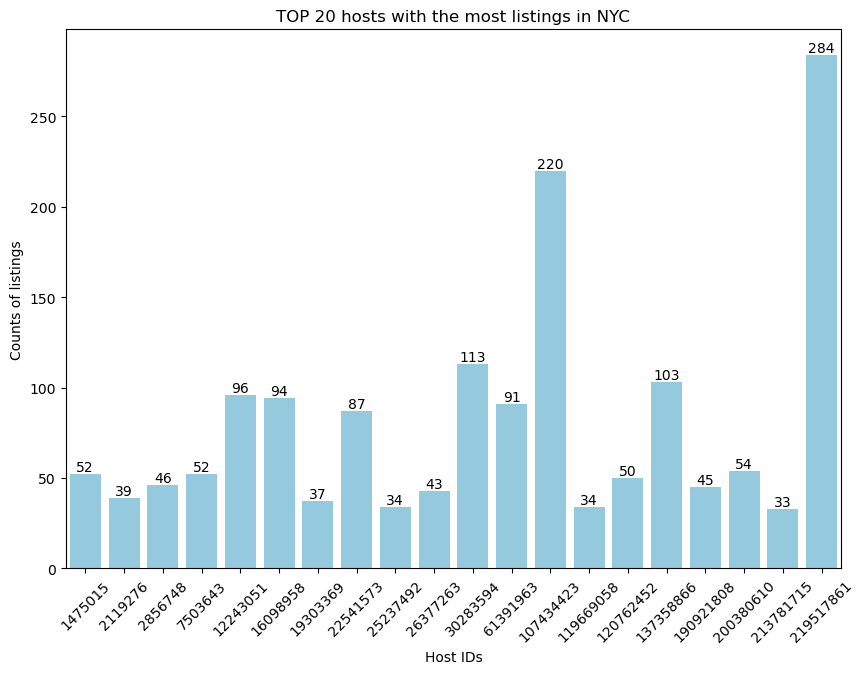

In [76]:
#Create a bar chart
ax = sns.barplot(x='host_id', y='count', data=top_20_host, color='skyblue')
#ax = sns.barplot(x='host_id', y='calculated_host_listings_count', data=top_20_host, color='skyblue')

plt.title('TOP 20 hosts with the most listings in NYC')
plt.xlabel('Host IDs')
plt.ylabel('Counts of listings')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container)
    
# Display the chart
plt.show()

In [77]:
# plt.figure(figsize=(10,6))
# plt.bar(top_20_host['host_id'], top_20_host['count'], color='blue')

# # Setting title and labels
# plt.title('TOP 20 hosts with the most listings in NYC')
# plt.xlabel('Host IDs')
# plt.ylabel('Counts of listings')

# # Rotate the x-axis labels by 45 degrees
# plt.xticks(rotation=45)

# # Display the plot
# plt.show()

# # Display the plot
# plt.show()

In [78]:
# Now, let's count the amount of listings in NY by neighbourhood group (neighbourhood_group)

listing_per_ng = pd.DataFrame(df.neighbourhood_group.value_counts())
listing_per_ng.reset_index(inplace=True)
listing_per_ng

,neighbourhood_group,count
0,Manhattan,20366
1,Brooklyn,19712
2,Queens,5612
3,Bronx,1077
4,Staten Island,365


In [79]:
#pd.DataFrame.plot?

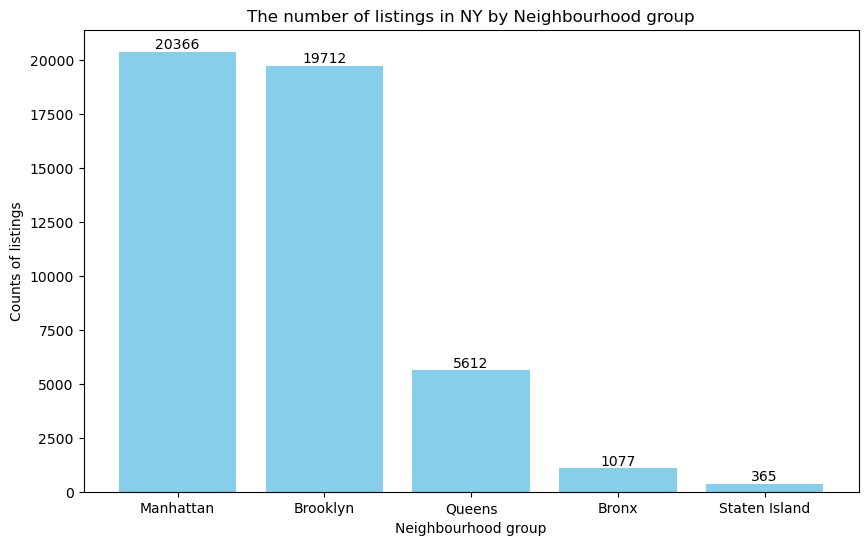

In [80]:
plt.figure(figsize=(10,6))
bars = plt.bar(listing_per_ng['neighbourhood_group'], listing_per_ng['count'], color='skyblue')

# Setting title and labels
plt.title('The number of listings in NY by Neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Counts of listings')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot
plt.show()

In [81]:
# As we can see from the above bar chart most of the listings are published in the Manhattan neighbourhood group. 
# The least amount of listings are published in the Staten Island neighbourhood group.

In [82]:
# Now, let's count the amount of listings in NY by room type in neighbourhood group (neighbourhood_group)
df.groupby(['neighbourhood_group', 'room_type']).size()

neighbourhood_group  room_type      
Bronx                Entire home/apt      370
                     Private room         648
                     Shared room           59
Brooklyn             Entire home/apt     9219
                     Private room       10081
                     Shared room          412
Manhattan            Entire home/apt    12059
                     Private room        7833
                     Shared room          474
Queens               Entire home/apt     2058
                     Private room        3360
                     Shared room          194
Staten Island        Entire home/apt      168
                     Private room         188
                     Shared room            9
dtype: int64

In [83]:
df.groupby(['neighbourhood_group', 'room_type']).size().unstack('room_type')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,370,648,59
Brooklyn,9219,10081,412
Manhattan,12059,7833,474
Queens,2058,3360,194
Staten Island,168,188,9


<Figure size 1000x700 with 0 Axes>

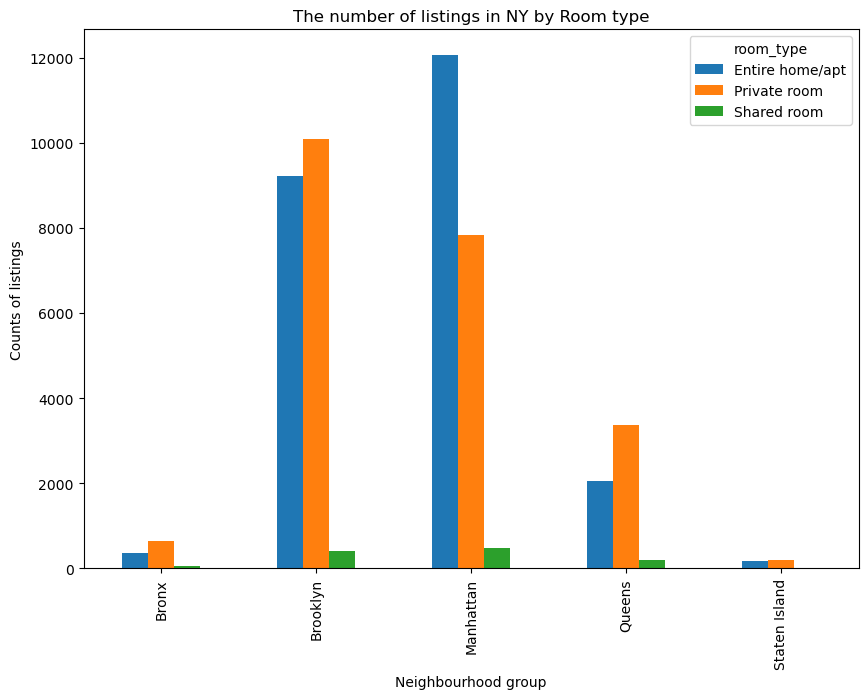

In [84]:
plt.clf()
df.groupby(['neighbourhood_group', 'room_type']).size().unstack('room_type').plot(kind='bar')

# Setting title and labels
plt.title('The number of listings in NY by Room type')
plt.xlabel('Neighbourhood group')
plt.ylabel('Counts of listings')
plt.show()

In [85]:
# As we can se from the above bar chart most of the listings are published in the Manhattan neighbourhood group. 
# The least amount of listings are published in the Staten Island neighbourhood group.

In [86]:
df["room_type"].value_counts()

room_type
Entire home/apt    23874
Private room       22110
Shared room         1148
Name: count, dtype: int64

In [87]:
# Loading the image
img = Image.open('New_York_City_.png')  # replace with your PNG file path

<Figure size 1000x700 with 0 Axes>

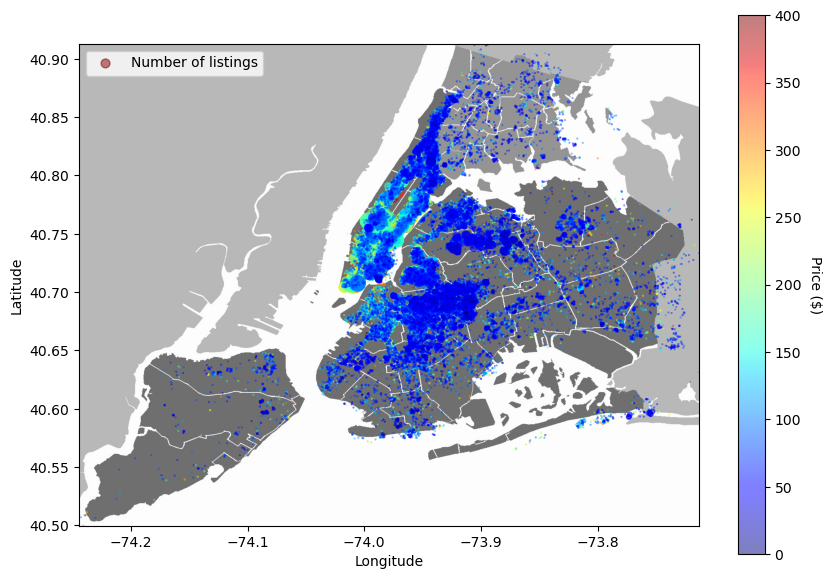

In [88]:
# Create a figure and axis with the same dimensions as the image
plt.clf()
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.244420, -73.712990, 40.499790, 40.913060])  # Set image boundaries (adjust to match your map's min & max longitude, latitude coordinates)

# Scatter plot for 'longitude' and 'latitude'
scatter = ax.scatter(df['longitude'], df['latitude'], 
                    s=df['calculated_host_listings_count'], # Size of dots based on number of listings
                    c=df['price'], 
                    label='Number of listings', 
                    marker='.', 
                    cmap='jet',
                    alpha=0.5) # Set transparency of the dots
         

# Set labels (optional)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add the legend
ax.legend(loc='upper left')

# Add a color bar with a label for the 'price' column
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price ($)', rotation=270, labelpad=15)  # Rotate and pad the label

# Display the plot
plt.show()

<Figure size 1000x700 with 0 Axes>

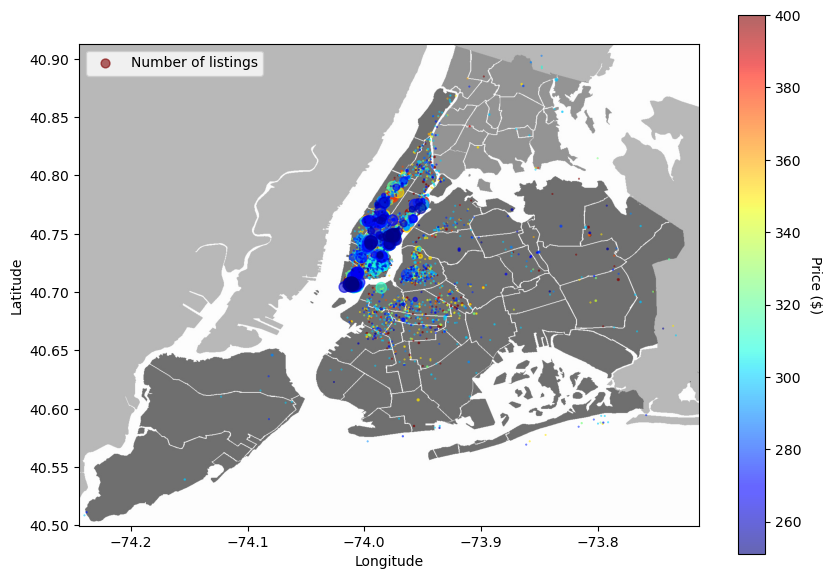

In [89]:
# Let's set a threshold of $250 for price column and look at the map

plt.clf()
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.244420, -73.712990, 40.499790, 40.913060])  # Set image boundaries (adjust to match your map's min & max longitude, latitude coordinates)

threshold_price = 250  

high_value_df = df[(df['price'] > threshold_price)]
scatter_high = ax.scatter(
                    high_value_df['longitude'], high_value_df['latitude'], 
                    s=high_value_df['calculated_host_listings_count'], # Size of dots based on number of listings
                    c=high_value_df['price'], 
                    label='Number of listings', 
                    marker='.', 
                    cmap='jet',
                    alpha=0.6, # Set transparency of the dots
                    zorder=2)
         
# Set labels (optional)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add the legend
ax.legend(loc='upper left')

# Add a color bar with a label for the 'price' column
cbar = plt.colorbar(scatter_high, ax=ax)
cbar.set_label('Price ($)', rotation=270, labelpad=15)  # Rotate and pad the label

# Display the plot
plt.show()

In [90]:
#The visualization above shows that a large number of apartments priced at $200 or more per night are listed in Manhattan neighbourhood group.

In [91]:
#Let's see on the map which 100 hosts are the busiest in NY

busiest_hosts_100 = df.sort_values(by=['availability_365', 'number_of_reviews'], ascending=[True, False]).head(100)
#busiest_hosts_100

In [92]:
#busiest_hosts_100[['host_id', 'neighbourhood_group', 'price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

<Figure size 1000x700 with 0 Axes>

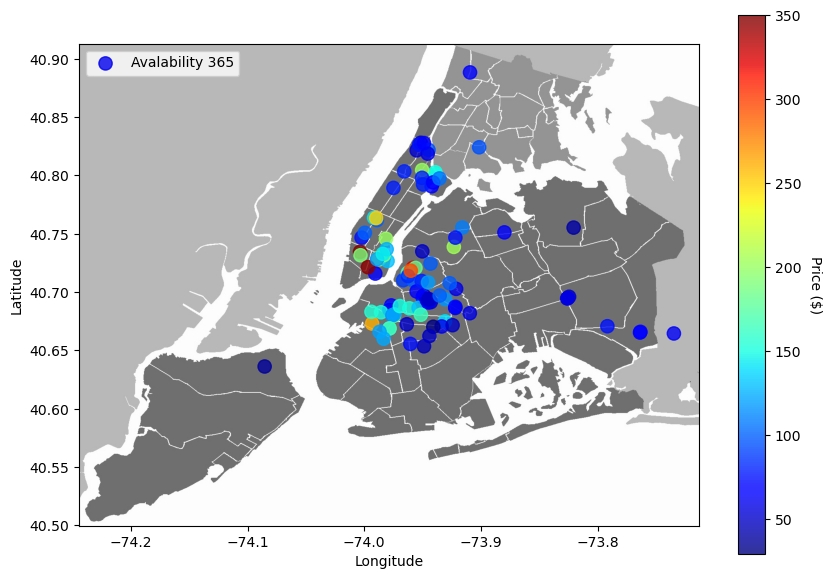

In [93]:
plt.clf()
fig, ax = plt.subplots()
ax.imshow(img, extent=[-74.244420, -73.712990, 40.499790, 40.913060])  # Set image boundaries (adjust to match your map's min & max longitude, latitude coordinates)

scatter_busiest_hosts_100 = ax.scatter(
                    busiest_hosts_100['longitude'], busiest_hosts_100['latitude'], 
                    #s=busiest_hosts_100['number_of_reviews'], # Size of dots based on number of reviews
                    s= 365-busiest_hosts_100['availability_365'],
                    c=busiest_hosts_100['price'], 
                    label='Avalability 365', 
                    marker='.', 
                    cmap='jet',
                    alpha=0.8, # Set transparency of the dots
                    zorder=2)
         
# Set labels (optional)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add the legend
ax.legend(loc='upper left')

# Add a color bar with a label for the 'price' column
cbar = plt.colorbar(scatter_busiest_hosts_100, ax=ax)
cbar.set_label('Price ($)', rotation=270, labelpad=15)  # Rotate and pad the label

# Display the plot
plt.show()

In [94]:
busiest_hosts_20 = df.sort_values(by=['availability_365', 'number_of_reviews'], ascending=[True, False]).head(20)
busiest_hosts_20[['host_id', 'neighbourhood_group', 'price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

,host_id,neighbourhood_group,price,number_of_reviews,calculated_host_listings_count,availability_365
471,792159,Brooklyn,60,480,1,0
9974,22959695,Queens,50,424,5,0
9976,22959695,Queens,50,408,5,0
22104,121391142,Queens,65,368,2,0
5876,21641206,Brooklyn,53,351,4,0
22100,121391142,Queens,65,325,2,0
890,1649300,Brooklyn,325,320,1,0
6888,22210080,Manhattan,99,318,1,0
1242,1787284,Queens,109,304,1,0
13539,51954926,Brooklyn,72,255,4,0


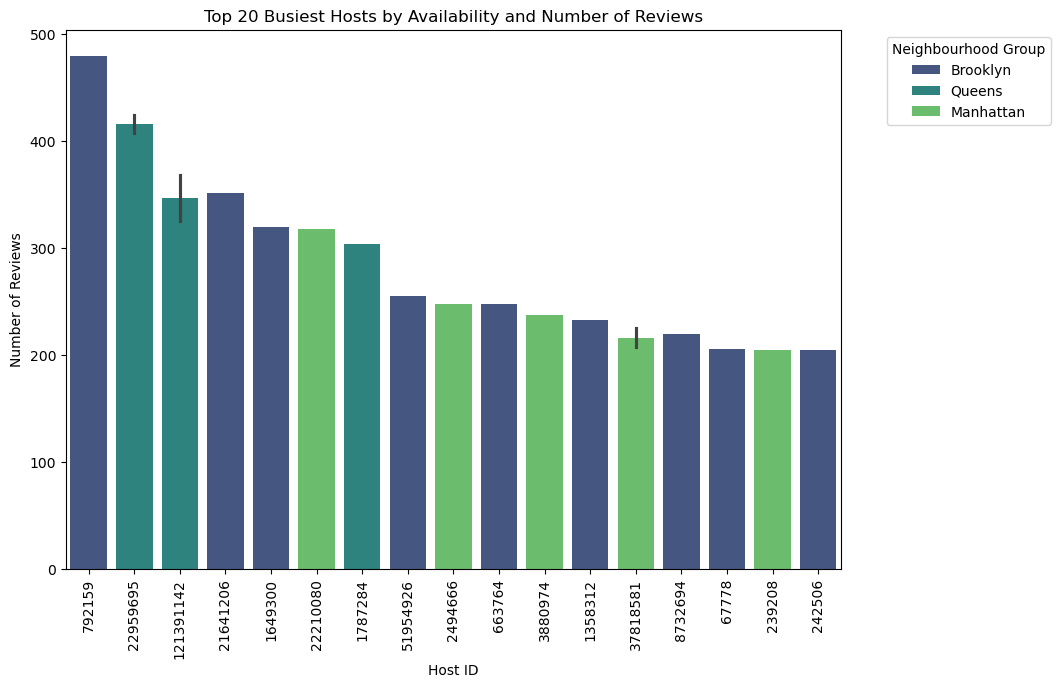

In [95]:
#plt.figure(figsize=(12, 8))
sns.barplot(x=busiest_hosts_20['host_id'].astype(str), y=busiest_hosts_20['number_of_reviews'], hue=busiest_hosts_20['neighbourhood_group'], 
            palette='viridis')
plt.xlabel('Host ID')
plt.ylabel('Number of Reviews')
plt.title('Top 20 Busiest Hosts by Availability and Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Correlation Matrix

In [96]:
# Let's examine is there any correlations between numerical columns

df.corr(numeric_only=True)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.017809,0.137713,-0.010692,-0.018404,-0.137550,0.210385,0.146702,0.196756
latitude,0.017809,1.000000,0.087843,0.072756,0.024672,-0.014001,-0.018280,0.021966,-0.014623
longitude,0.137713,0.087843,1.000000,-0.299704,-0.064340,0.056348,0.140321,-0.111101,0.093661
price,-0.010692,0.072756,-0.299704,1.000000,0.031842,-0.041999,-0.051791,0.167427,0.079196
minimum_nights,-0.018404,0.024672,-0.064340,0.031842,1.000000,-0.080773,-0.125360,0.133336,0.145655
number_of_reviews,-0.137550,-0.014001,0.056348,-0.041999,-0.080773,1.000000,0.591755,-0.072067,0.180089
reviews_per_month,0.210385,-0.018280,0.140321,-0.051791,-0.125360,0.591755,1.000000,-0.052270,0.169678
calculated_host_listings_count,0.146702,0.021966,-0.111101,0.167427,0.133336,-0.072067,-0.052270,1.000000,0.227509
availability_365,0.196756,-0.014623,0.093661,0.079196,0.145655,0.180089,0.169678,0.227509,1.000000


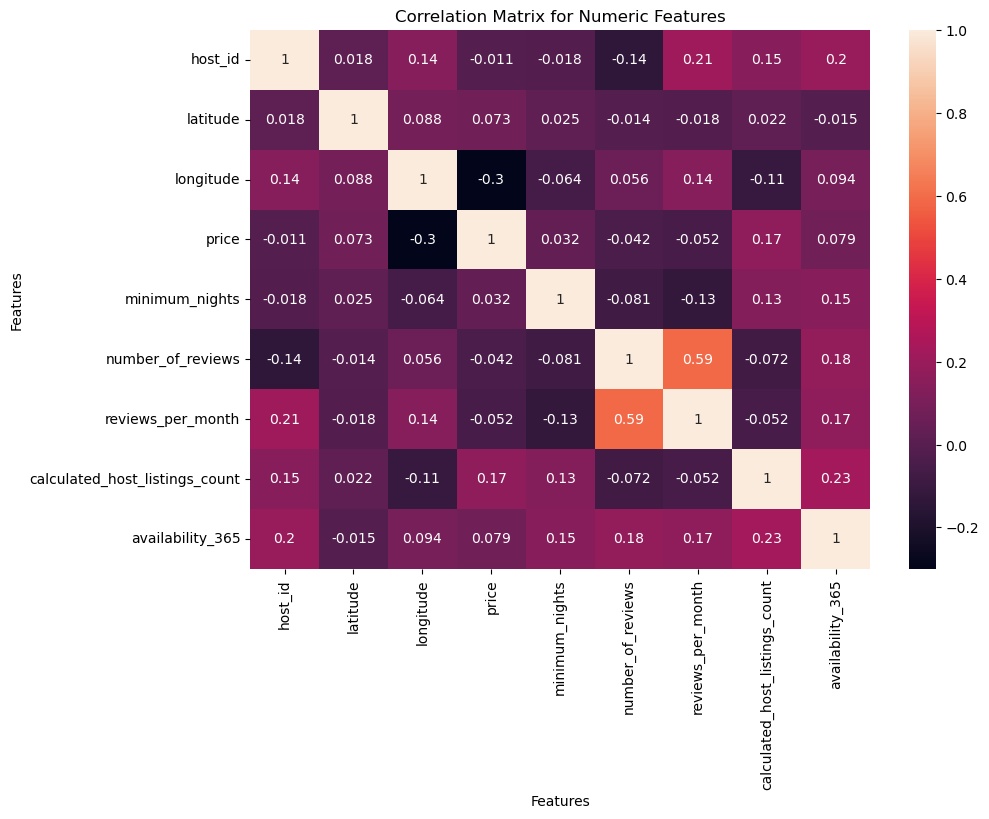

In [97]:
# Let's check correlation between all columns

correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Features')

plt.ylabel('Features')

plt.show()

In [98]:
# As you can see from the table and the diagram above there is no or little (except number_of_reviews and reviews_per_month) correlation between these numerical data :-(

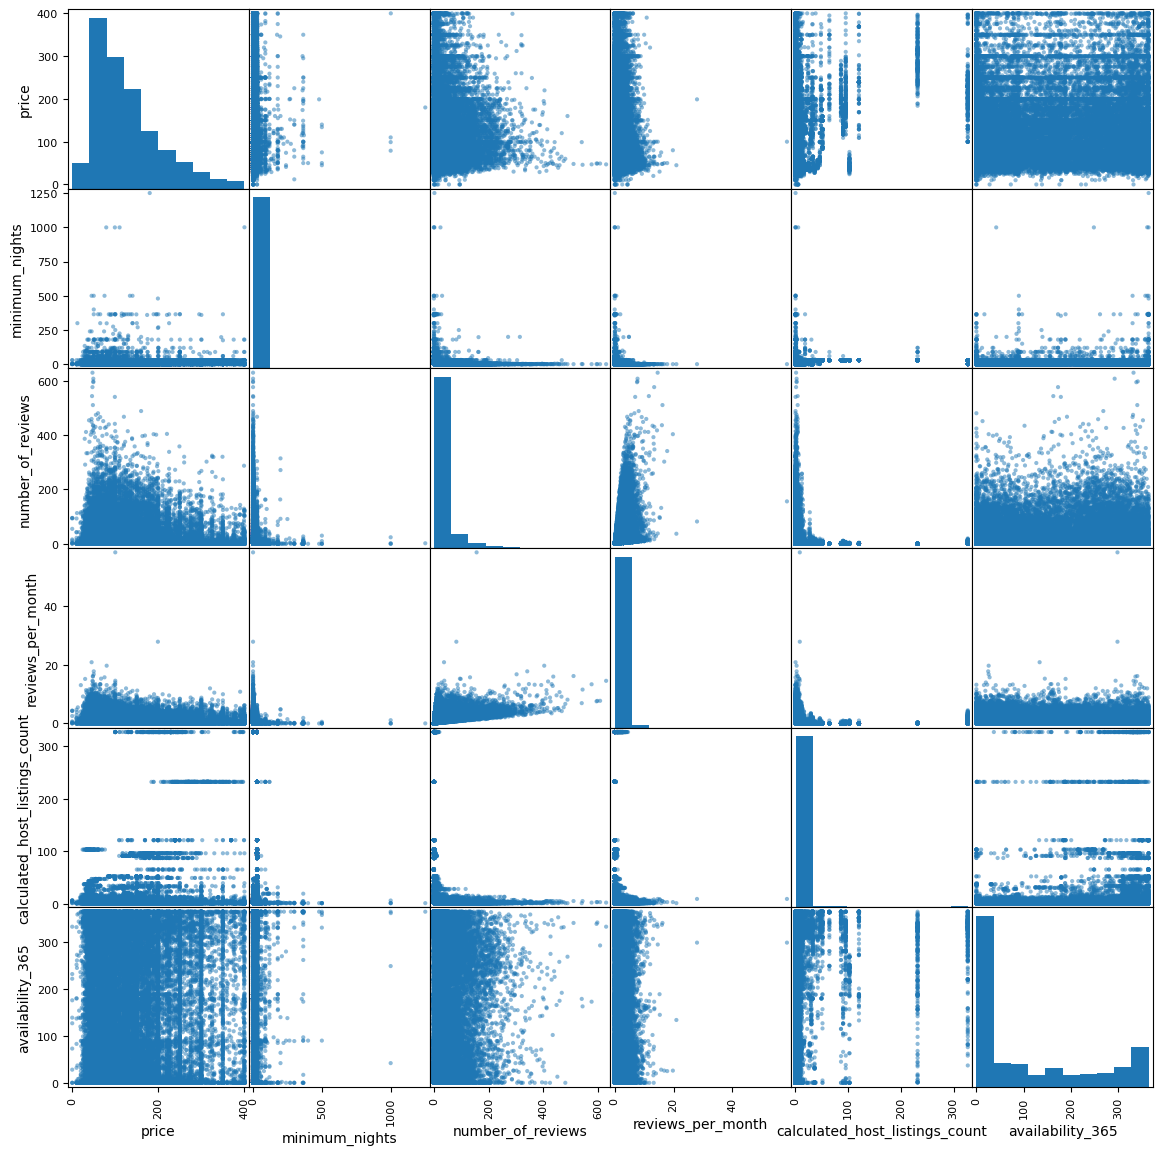

In [99]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
              'calculated_host_listings_count', 'availability_365']
scatter_matrix(df[attributes], figsize=(14, 14))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()